# Import dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
import visuals as vs

# Load dataset

In [2]:
train = pd.read_csv('processed_data/processed_train_data.csv')
test = pd.read_csv('processed_data/processed_test_data.csv')

In [10]:
X_train = train.drop('SeriousDlqin2yrs', axis=1)#train[["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate", "age", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]].as_matrix()
X_valid = test.drop('SeriousDlqin2yrs', axis=1)#test[["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate", "age", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]].as_matrix()
y_train = train["SeriousDlqin2yrs"].as_matrix()
y_valid = test["SeriousDlqin2yrs"].as_matrix()

# Test benchmark(baseline) model

In [11]:
y_benchmark = np.random.randint(2,size=len(y_test))
f1Score = f1_score(y_test, y_benchmark)

aurocScore = roc_auc_score(y_test, y_benchmark) 
print "Random Classifier: [F1 score: {:.4f}, AUROC score: {:.4f}]".format(f1Score, aurocScore)

Random Classifier: [F1 score: 0.1213, AUROC score: 0.4976]


# Create a training and predicting pipeline

In [12]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    training_features = X_train[:sample_size]
    training_labels = y_train[:sample_size]
    start = time() # Get start time
    learner = learner.fit(training_features, training_labels)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
    
    # Get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute F1-score on the the first 300 training samples using f1_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train)
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test)
    
    # Compute AUROC-score on the test set which is y_test
    results['auroc_train'] = roc_auc_score(y_train[:300], predictions_train)
    
    # Compute AUROC-score on the test set which is y_test
    results['auroc_test'] = roc_auc_score(y_test, predictions_test)
    
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

GradientBoostingClassifier trained on 902 samples.
GradientBoostingClassifier trained on 9020 samples.
GradientBoostingClassifier trained on 90201 samples.


/Users/hyungsukkang/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 902 samples.
SVC trained on 9020 samples.
SVC trained on 90201 samples.
LogisticRegression trained on 902 samples.
LogisticRegression trained on 9020 samples.
LogisticRegression trained on 90201 samples.
MLPClassifier trained on 902 samples.
MLPClassifier trained on 9020 samples.
MLPClassifier trained on 90201 samples.


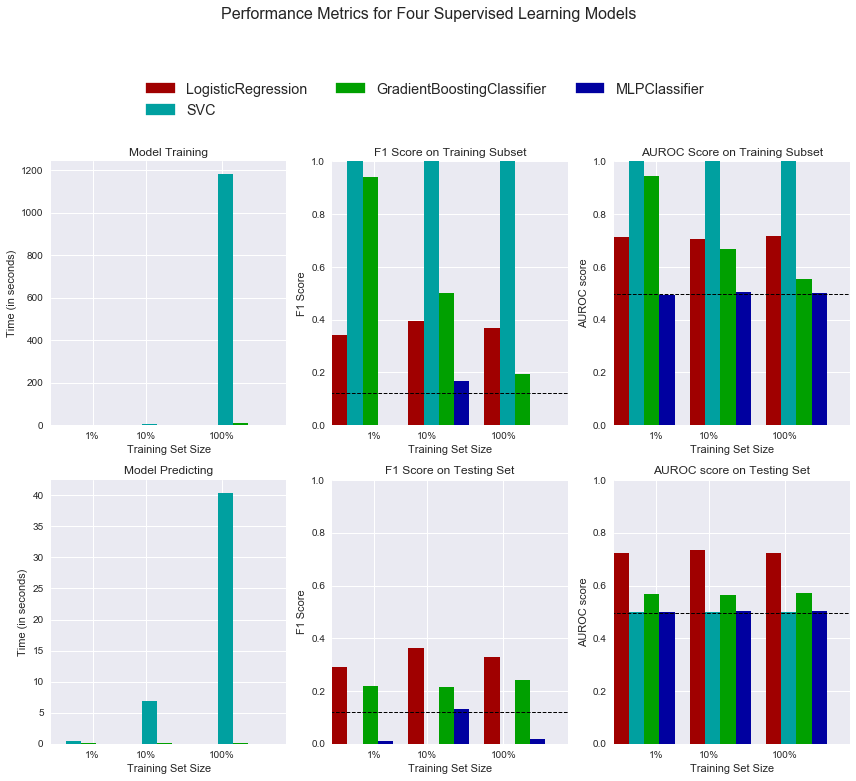

In [14]:
clf_A = GradientBoostingClassifier(random_state=42, max_depth=5, subsample=0.8)
clf_B = svm.SVC(random_state=42, class_weight='balanced', gamma=0.55)
clf_C = LogisticRegression(random_state=42, class_weight='balanced', max_iter=200)
clf_D = MLPClassifier(random_state=42, learning_rate='adaptive', max_iter=500, shuffle=True)

samples_100 = len(y_train)
samples_10 = len(y_train)/10
samples_1 = len(y_train)/100


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_valid, y_valid)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, f1Score, aurocScore)

# Logistic Regression is The optimal model based on the results.